## Final Project Submission

Please fill out:
* Student name: Samson Sosa Jomo
* Student: Part time
* Scheduled project review date/time: 
* Instructor name: Noah Kandie
* Blog post URL:


In [2]:
#Importing relevant libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 




In [3]:
#Reading the data

data=pd.read_csv(r'C:\Users\jomos\OneDrive\Documents\dsc-phase-1-project\zippedData\imdb.title.basics.csv.gz')
data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Understanding the data 

Initial exploration to understand the dataset


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


We can see a significant amount of null values in some columns like ; original tittle, runtime_minutes and genres

In [5]:
# getting the number of columns and rows 

shape=data.shape
print(shape)

(146144, 6)


In [6]:
data.describe() #this is to get the statistical summary for numerical data

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
print(data.nunique()) # get number of unique values per column

tconst             146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64


In [8]:
print(data['genres'].unique() )#Getting the unique values in the genres

['Action,Crime,Drama' 'Biography,Drama' 'Drama' ...
 'Music,Musical,Reality-TV' 'Animation,Crime' 'Adventure,History,War']


Checking for null values in the data and making correct changes

In [9]:
print(data.isnull().sum())

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


There are columns with a significant null value which can affect our analysis

original_tittle has 21 null values , runtime_minutes  has 31739 which is abit significant,then genres has 5408 nulls

In [10]:
data.head(2) # insight of the data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


lets start off by filling the nulls in the original title column 

I will replace the nulls with the primary_title

In [11]:
data['original_title'] = data['original_title'].fillna(data['primary_title'])

In [12]:
#check if null values are still there in the column
print(data.original_title.isnull().sum())

0


Solve the null values in the runtime_minutes

there is a significant amount of nulls so ill see the best way to go about it because dropping them might affect the data

In [13]:
#Getting the number of nulls in runtime column
print(data['runtime_minutes'].isnull().sum())

31739


In [14]:
#statistical description of the runtime column
print(data['runtime_minutes'].describe())

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64


In [15]:
print(data.runtime_minutes.mode())
print(data.runtime_minutes.mean())

0    90.0
dtype: float64
86.18724706088021


I will fill the null runtimes wit the mean of the column for consistency !!

In [16]:
data['runtime_minutes']=data['runtime_minutes'].fillna(data['runtime_minutes'].mean())# replacing all null with the mean

In [17]:
#checking for any missing value in the null column
print(data.runtime_minutes.isnull().sum())

0


In [18]:
print(data.isnull().sum())

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64


Now only the genres column has null values

In [19]:
data.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


Because I cannot fill a different genre name to a different title ill just drop the columns with no genres

In [20]:
data= data.dropna(subset=['genres']) #dropping all rows that had null values in the  genres column

In [21]:
#checking for null values in our data after cleaning

print(data.isnull().sum())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [22]:
print(data.shape) # the number of rows has reduced after dropping null values in the genre column

(140736, 6)


In [46]:
data.duplicated().sum()# checking for dup;icates

0

Now that our data is clean we can go ahead and analyse and understand it

In [24]:
data.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


Univariate Analysis

In [25]:
print(data.runtime_minutes.describe())

count    140736.000000
mean         86.246782
std         149.933089
min           1.000000
25%          75.000000
50%          86.187247
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64


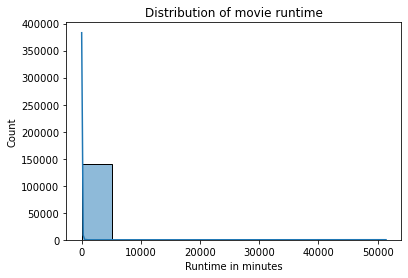

In [26]:
#plot a histogram for distribution of Movie runtime 
plt.figure()
sns.histplot(data['runtime_minutes'],bins=10, kde=True)
plt.title('Distribution of movie runtime')
plt.xlabel('Runtime in minutes')
plt.ylabel('Count')
plt.show()




Its like the data is left skewed .

most of the runtime is below 10000

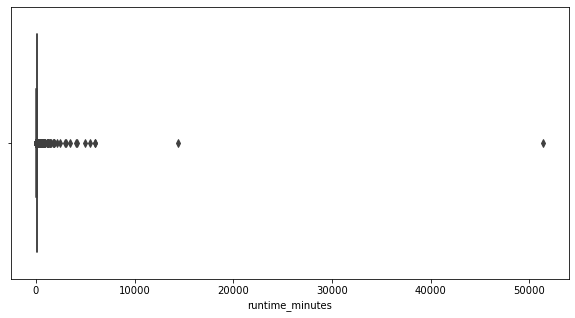

In [27]:
#boxplot to show outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=data['runtime_minutes'])
plt.show();

The boxplot shows there are only two outliers that are to the extreme 

lets get rid of them then plot a better histogram

In [28]:
runtime=data['runtime_minutes'][data['runtime_minutes']<300]#runtime will be the data for movies less than 300 minutes 

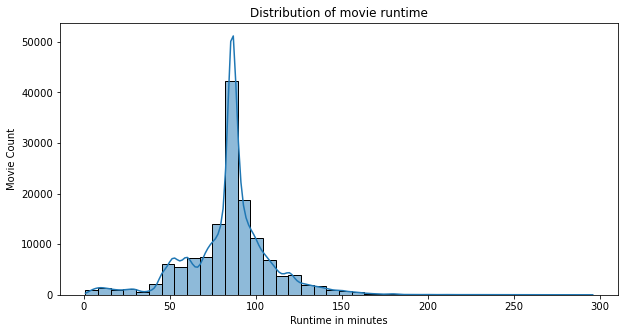

In [29]:
#a better plot for the distribution of the runtime

plt.figure(figsize=(10,5))
sns.histplot(runtime,bins=40 ,kde=True)
plt.title('Distribution of movie runtime')
plt.xlabel('Runtime in minutes')
plt.ylabel("Movie Count")
plt.show()


I can already see that Most movies watched are between 80 and 90 minutes 

this shows most of the succesful movies are 80 to 90 minutes long 

Univariate Analysis for Number of movies released per year

In [30]:
data.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


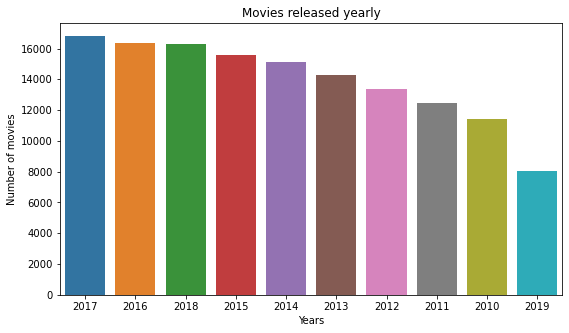

In [31]:
plt.figure(figsize=(9,5))
sns.countplot(x="start_year",data=data ,order=data['start_year'].value_counts().index[:10])# to plot top 10 years with most movies released
plt.title("Movies released yearly")
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()

2017 had the most number of movies produced and 2019 had the least number of movies

let me take a look at 2017 to see what were the movies

In [32]:
data.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [33]:
df=data[data['start_year']==2017]
df # df is now a dataframe for all the movies in 2017

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
6,tt0112502,Bigfoot,Bigfoot,2017,86.187247,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000,"Adventure,Animation,Comedy"
47,tt0331314,Bunyan and Babe,Bunyan and Babe,2017,84.000000,"Adventure,Animation,Comedy"
51,tt0339736,The Evil Within,The Evil Within,2017,98.000000,Horror
...,...,...,...,...,...,...
146101,tt9910206,Facebook idióták - A Mozifilm,Facebook idióták - A Mozifilm,2017,86.187247,"Action,Adventure,Comedy"
146102,tt9910238,Be 5min. vede,Be 5min. vede,2017,80.000000,"Comedy,Romance"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.000000,"Drama,Mystery,Thriller"
146125,tt9914642,Albatross,Albatross,2017,86.187247,Documentary


let me now get the top genre of the first genre names

In [34]:
df['Main_genre']= df['genres'].apply(lambda x: x.split(',')[0]) # this creates a new column with only the index 0 name which is the first one in the main genre name
df

<ipython-input-34-709b68f5bea3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main_genre']= df['genres'].apply(lambda x: x.split(',')[0]) # this creates a new column with only the index 0 name which is the first one in the main genre name


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Main_genre
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,86.187247,"Horror,Thriller",Horror
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000,"Adventure,Animation,Comedy",Adventure
47,tt0331314,Bunyan and Babe,Bunyan and Babe,2017,84.000000,"Adventure,Animation,Comedy",Adventure
51,tt0339736,The Evil Within,The Evil Within,2017,98.000000,Horror,Horror
...,...,...,...,...,...,...,...
146101,tt9910206,Facebook idióták - A Mozifilm,Facebook idióták - A Mozifilm,2017,86.187247,"Action,Adventure,Comedy",Action
146102,tt9910238,Be 5min. vede,Be 5min. vede,2017,80.000000,"Comedy,Romance",Comedy
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.000000,"Drama,Mystery,Thriller",Drama
146125,tt9914642,Albatross,Albatross,2017,86.187247,Documentary,Documentary


Now that i have the main_genre column i can see which genre is liked by most people

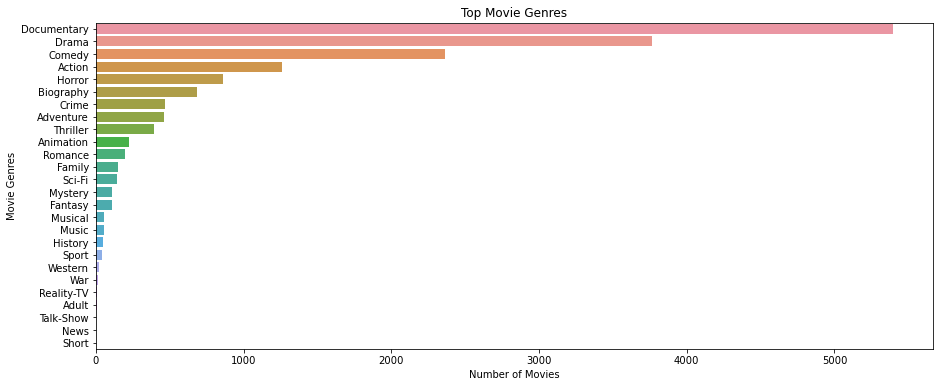

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(y='Main_genre', data=df, order=df['Main_genre'].value_counts().index)
plt.title('Top Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Movie Genres')
plt.show()

From the count plot I see that Documentary has most movies and talk shows has the least movies

People like documentaries more

Bivariate analysis

Runtime by genre

In [36]:
df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Main_genre
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,86.187247,"Horror,Thriller",Horror


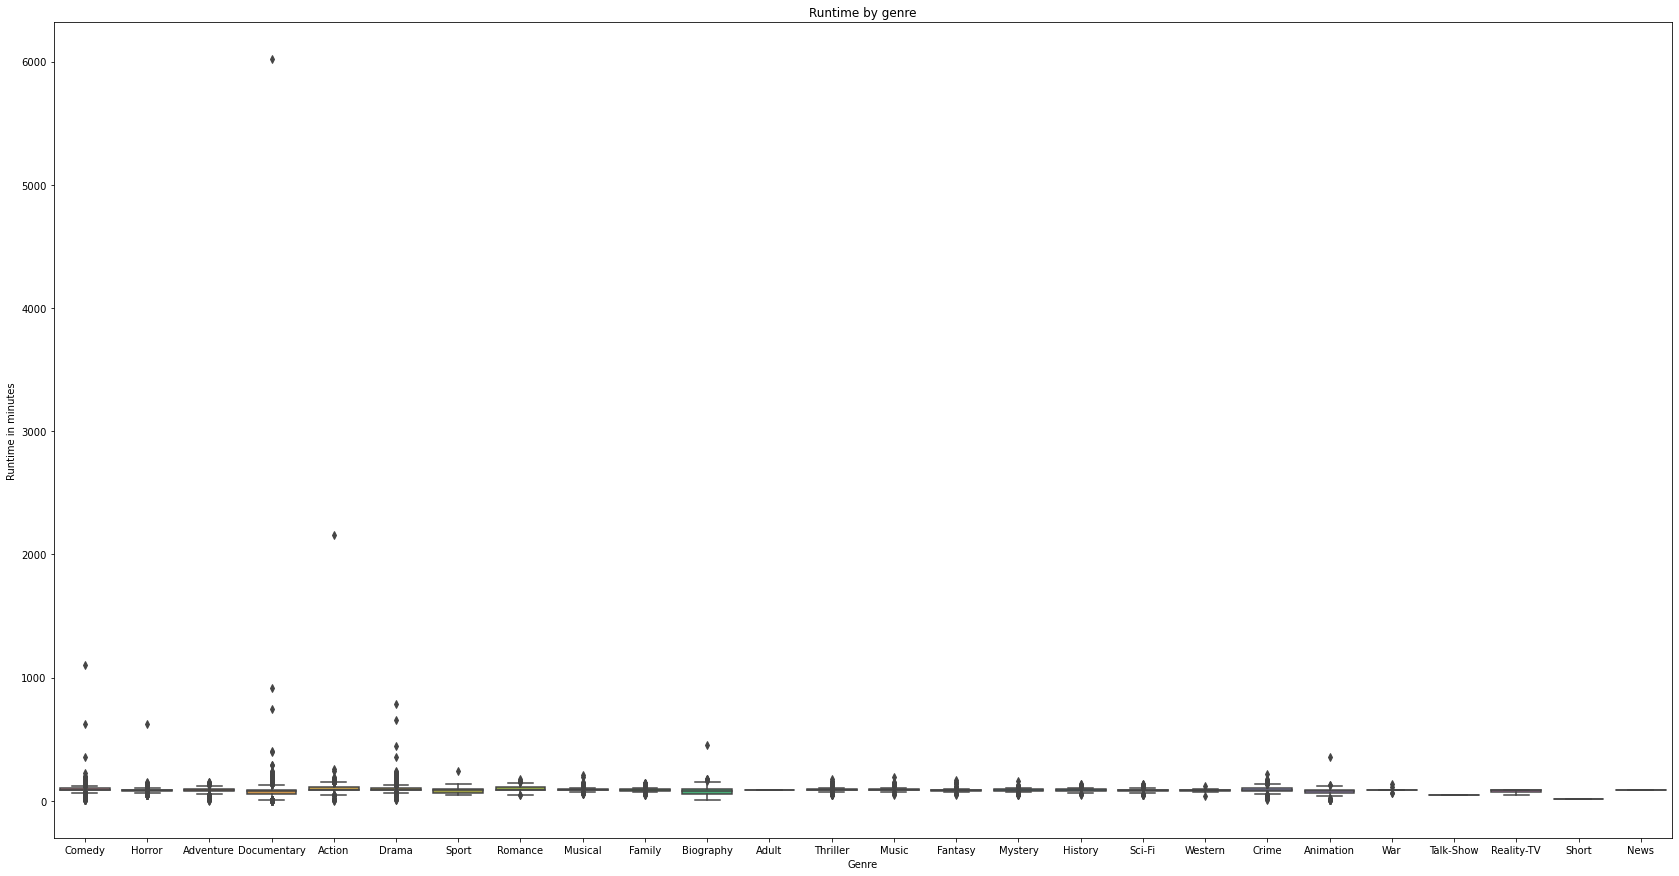

In [37]:
#boxplot for main genre and runtime

plt.figure(figsize=(29,15))
sns.boxplot(x='Main_genre', y='runtime_minutes', data=df)
plt.title('Runtime by genre')
plt.xlabel('Genre')
plt.ylabel('Runtime in minutes')
plt.show()

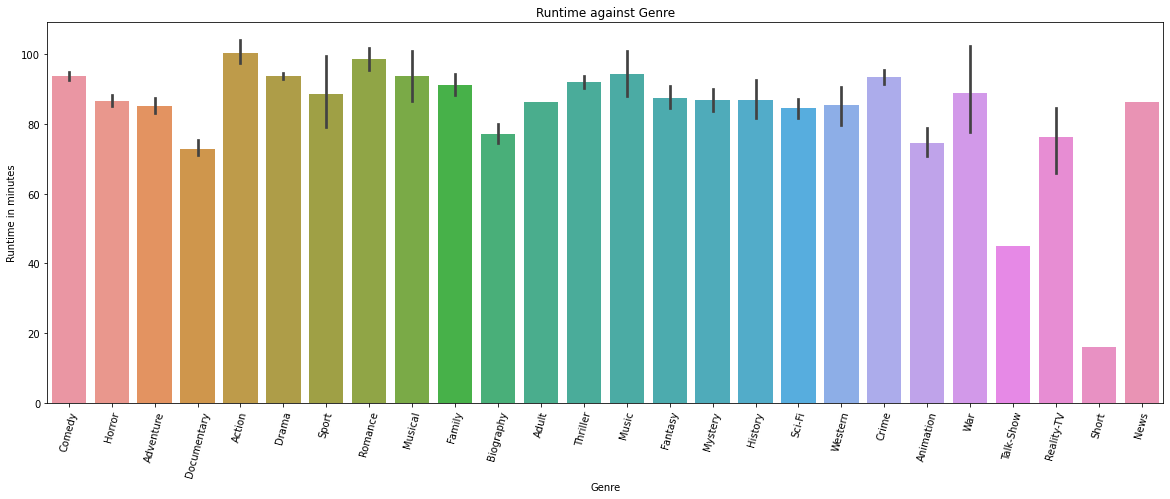

In [38]:
#bar plot to show runtime against gender
plt.figure(figsize=(20,7))
sns.barplot(data=df, y= 'runtime_minutes', x='Main_genre')
plt.title('Runtime against Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime in minutes')
plt.xticks(rotation=75)
plt.show()

Action movies tend to be longer than other movies 

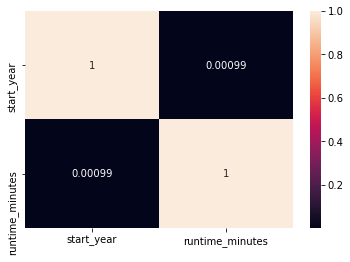

In [39]:
#heat map for the correlation between the two
sns.heatmap(data.corr(),annot=True)
plt.show()

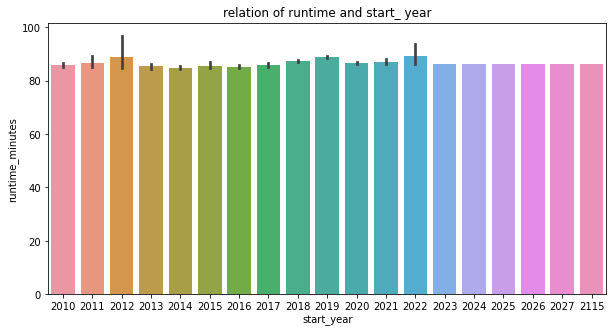

In [40]:
#Runtime over the years
plt.figure(figsize=(10,5))
sns.barplot(data=data, x = 'start_year', y='runtime_minutes')
plt.title('relation of runtime and start_ year')
plt.show()

In 2012, movies produced were  longer  compared to other years

Genre and movie count

In [41]:
data.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [42]:
data['Main_genre']= data['genres'].apply(lambda x: x.split(',')[0])



<ipython-input-42-bb5542ff67b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Main_genre']= data['genres'].apply(lambda x: x.split(',')[0])


In [43]:
data.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Main_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography


In [44]:
Genre_year=data.groupby(['start_year','Main_genre']).size().reset_index(name='count')
Genre_year

,start_year,Main_genre,count
0,2010,Action,891
1,2010,Adventure,371
2,2010,Animation,128
3,2010,Biography,740
4,2010,Comedy,1832
...,...,...,...
292,2024,Adventure,1
293,2025,Action,1
294,2026,Fantasy,1
295,2027,Action,1


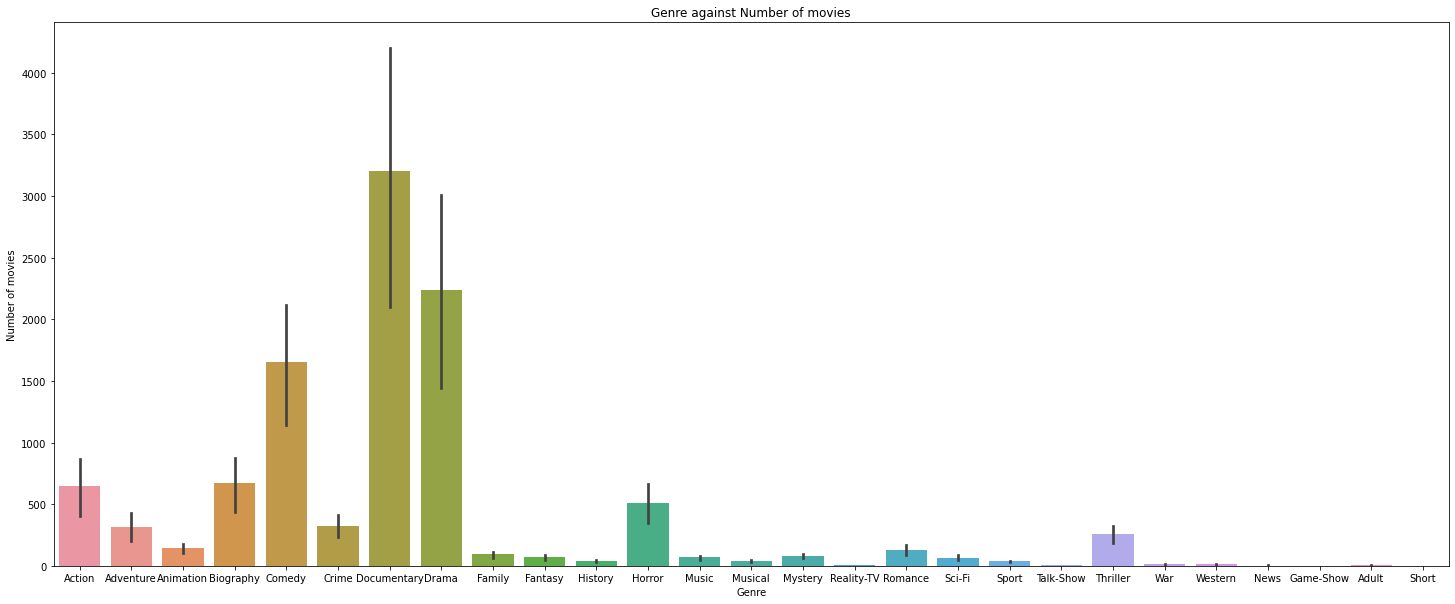

In [45]:
plt.figure(figsize=(25,10))
sns.barplot(data= Genre_year,x='Main_genre',y='count')
plt.title('Genre against Number of movies')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()


We can see that documentary, drama and comedy have the most number of movies

## Findings

1.Documentary, Drama, comedy and Action are the most common genres. So the company should focus movie creation to these genres

2.Most of the movies that are succesful are between 80 to 90 minutes . Microsoft should atleast try and keep the movies within this ranges in time

3.Action movies have a higher runtime than other movies but the number of movies are relatively less. Microsoft should invest in creating more action movies also.

